In [ ]:
#Import essential libraries
import math
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [ ]:
#storing data into dataframe
df = pd.read_csv('AAPL.csv')
df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-01,79.437500,80.587502,79.302498,80.462502,79.923965,80791200
1,2020-06-02,80.187500,80.860001,79.732498,80.834999,80.293968,87642800
2,2020-06-03,81.165001,81.550003,80.574997,81.279999,80.735992,104491200
3,2020-06-04,81.097504,81.404999,80.195000,80.580002,80.040680,87560400
4,2020-06-05,80.837502,82.937500,80.807503,82.875000,82.320328,137250400
5,2020-06-08,82.562500,83.400002,81.830002,83.364998,82.807037,95654400
6,2020-06-09,83.035004,86.402496,83.002502,85.997498,85.421921,147712400
7,2020-06-10,86.974998,88.692497,86.522499,88.209999,87.619614,166651600
8,2020-06-11,87.327499,87.764999,83.870003,83.974998,83.412964,201662400
9,2020-06-12,86.180000,86.949997,83.555000,84.699997,84.133095,200146000


In [ ]:
#getdatashape
df.shape


(253, 7)

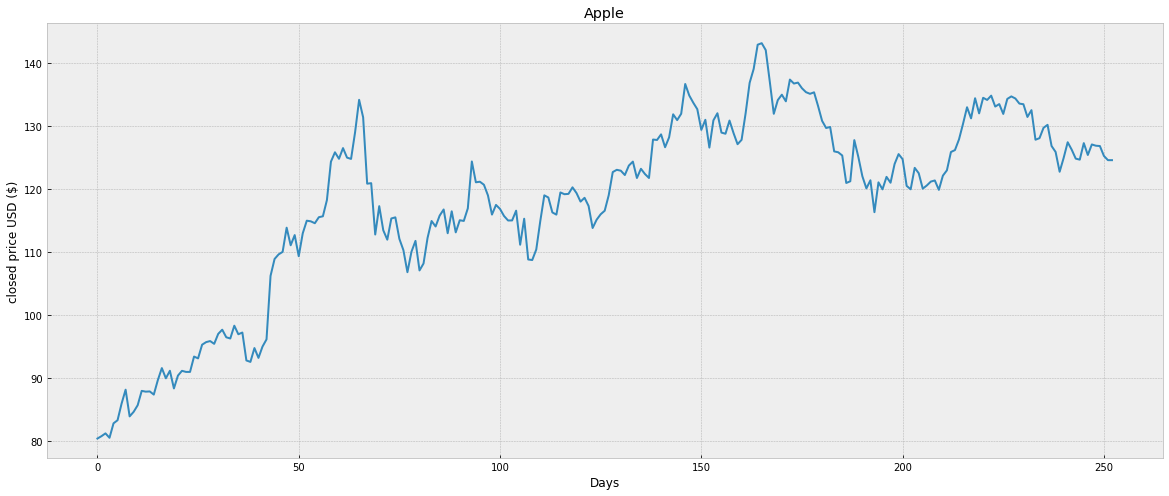

In [ ]:
#visualclosepricedata
plt.figure(figsize=(20,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('closed price USD ($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
#gettingcloseprice
df = df[['Close']]
df.head(10)

,Close
0,80.462502
1,80.834999
2,81.279999
3,80.580002
4,82.875000
5,83.364998
6,85.997498
7,88.209999
8,83.974998
9,84.699997


In [ ]:
#predictingdaysintofuture
future_days = 100
#targetdataprediction shifted units/days
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(10)

,Close,Prediction
243,124.849998,NaN
244,124.690002,NaN
245,127.309998,NaN
246,125.430000,NaN
247,127.099998,NaN
248,126.900002,NaN
249,126.849998,NaN
250,125.279999,NaN
251,124.610001,NaN
252,124.610001,NaN


In [ ]:
#createfuturedataset
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 80.462502]
 [ 80.834999]
 [ 81.279999]
 [ 80.580002]
 [ 82.875   ]
 [ 83.364998]
 [ 85.997498]
 [ 88.209999]
 [ 83.974998]
 [ 84.699997]
 [ 85.747498]
 [ 88.019997]
 [ 87.897499]
 [ 87.932503]
 [ 87.43    ]
 [ 89.717499]
 [ 91.6325  ]
 [ 90.014999]
 [ 91.209999]
 [ 88.407501]
 [ 90.445   ]
 [ 91.199997]
 [ 91.027496]
 [ 91.027496]
 [ 93.462502]
 [ 93.172501]
 [ 95.342499]
 [ 95.752502]
 [ 95.919998]
 [ 95.477501]
 [ 97.057503]
 [ 97.724998]
 [ 96.522499]
 [ 96.327499]
 [ 98.357498]
 [ 97.      ]
 [ 97.272499]
 [ 92.845001]
 [ 92.614998]
 [ 94.809998]
 [ 93.252502]
 [ 95.040001]
 [ 96.190002]
 [106.260002]
 [108.9375  ]
 [109.665001]
 [110.0625  ]
 [113.902496]
 [111.112503]
 [112.727501]
 [109.375   ]
 [113.010002]
 [115.010002]
 [114.907501]
 [114.607498]
 [115.5625  ]
 [115.707497]
 [118.275002]
 [124.370003]
 [125.857498]
 [124.824997]
 [126.522499]
 [125.010002]
 [124.807503]
 [129.039993]
 [134.179993]
 [131.399994]
 [120.879997]
 [120.959999]
 [112.82    ]
 [117.32    ]
 [113.

In [ ]:
#targetdatacreation as Y and convert target values except last X rows
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[116.870003 115.75     115.040001 115.050003 116.599998 111.199997
 115.32     108.860001 108.769997 110.440002 114.949997 119.029999
 118.690002 116.32     115.970001 119.489998 119.209999 119.260002
 120.300003 119.389999 118.029999 118.639999 117.339996 113.849998
 115.169998 116.029999 116.589996 119.050003 122.720001 123.080002
 122.940002 122.25     123.75     124.379997 121.779999 123.239998
 122.410004 121.779999 127.879997 127.809998 128.699997 126.660004
 128.229996 131.880005 130.960007 131.970001 136.690002 134.869995
 133.720001 132.690002 129.410004 131.009995 126.599998 130.919998
 132.050003 128.979996 128.800003 130.889999 128.910004 127.139999
 127.830002 132.029999 136.869995 139.070007 142.919998 143.160004
 142.059998 137.089996 131.960007 134.139999 134.990005 133.940002
 137.389999 136.759995 136.910004 136.009995 135.389999 135.130005
 135.369995 133.190002 130.839996 129.710007 129.869995 126.
 125.860001 125.349998 120.989998 121.260002 127.790001 125.120003
 

In [ ]:
#splitdata into 75% training and 25% tested
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
#createmodel
   #createdecisiontreeregressormodel
tree = DecisionTreeRegressor().fit(x_train, y_train)
   #createlinearregressionmodel
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#obtaining last datarows from future dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future


array([[114.907501],
       [114.607498],
       [115.5625  ],
       [115.707497],
       [118.275002],
       [124.370003],
       [125.857498],
       [124.824997],
       [126.522499],
       [125.010002],
       [124.807503],
       [129.039993],
       [134.179993],
       [131.399994],
       [120.879997],
       [120.959999],
       [112.82    ],
       [117.32    ],
       [113.489998],
       [112.      ],
       [115.360001],
       [115.540001],
       [112.129997],
       [110.339996],
       [106.839996],
       [110.080002],
       [111.809998],
       [107.120003],
       [108.220001],
       [112.279999],
       [114.959999],
       [114.089996],
       [115.809998],
       [116.790001],
       [113.019997],
       [116.5     ],
       [113.160004],
       [115.080002],
       [114.970001],
       [116.970001],
       [124.400002],
       [121.099998],
       [121.190002],
       [120.709999],
       [119.019997],
       [115.980003],
       [117.510002],
       [116.8

In [ ]:
#model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show midel linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[130.919998 130.919998 128.979996 128.800003 130.889999 139.070007
 127.139999 127.830002 124.610001 136.869995 139.070007 142.919998
 143.160004 142.059998 137.089996 131.960007 134.139999 134.990005
 125.120003 137.389999 120.589996 128.979996 136.009995 135.389999
 135.130005 135.369995 133.190002 130.839996 129.710007 129.869995
 126.       125.860001 120.529999 121.419998 121.260002 127.790001
 125.120003 122.059998 126.       121.419998 139.070007 131.960007
 131.960007 137.089996 121.029999 123.989998 125.57     121.419998
 120.529999 123.389999 123.389999 122.540001 133.720001 120.589996
 121.209999 121.389999 119.900002 122.150002 123.       121.029999
 126.209999 127.900002 130.360001 131.240005 131.240005 134.429993
 132.029999 134.5      130.889999 134.990005 125.860001 133.5
 131.940002 134.320007 134.720001 134.389999 133.580002 133.479996
 131.460007 132.539993 139.070007 131.460007 129.740005 130.210007
 131.460007 125.910004 122.769997 124.970001 127.449997 126.269997


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


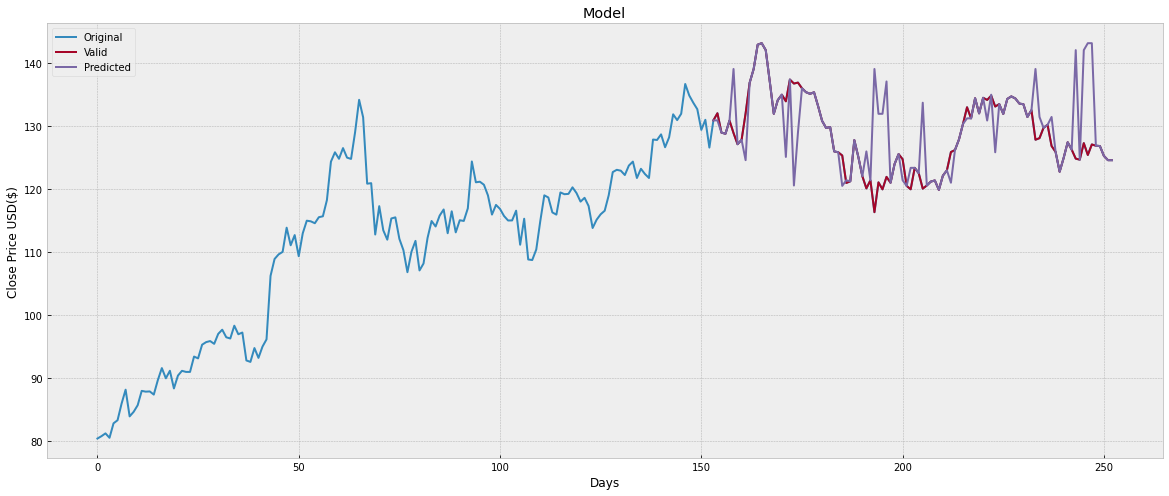

In [ ]:
#visualdata
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original', 'Valid', 'Predicted'])
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


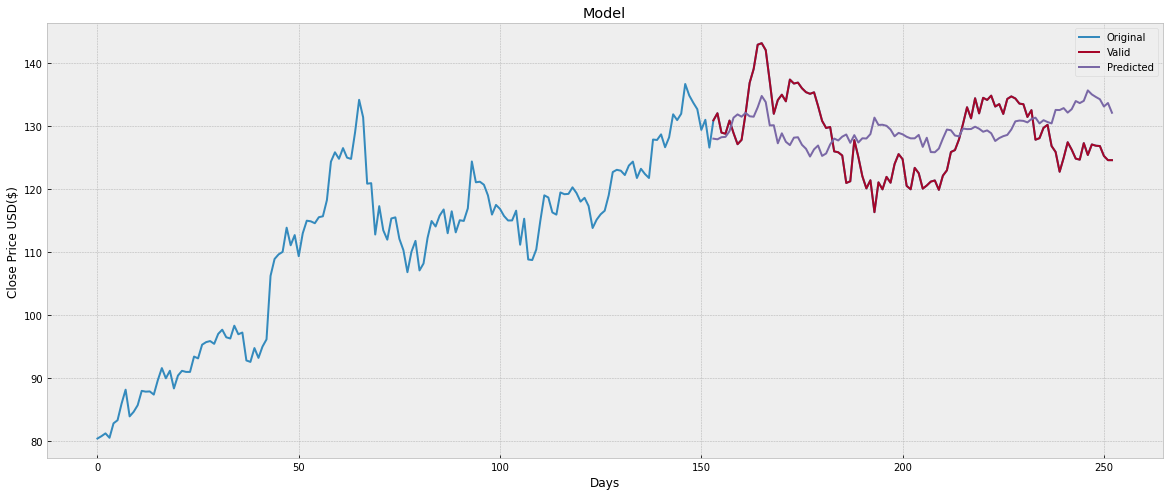

In [ ]:
#visualdata
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original', 'Valid', 'Predicted'])
plt.show()
